# Kaggle Competition Notebook

- Aurthor: Muhammad Anas
- Gmail : anastariq0077@gmail.com
- Kaggle Id: https://www.kaggle.com/muhammadanas007
- LinkenIn Id: https://www.linkedin.com/in/muhammad-anas-b2a597236/ 

# **Predict the Survival rate using Neural Network in Tensorflow**

### **Import the python libraries for Machine Learning and Deep Learning model :**

In [1]:
# Import the libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#Import the machine learning libraries from scikit-learn as sklearn:
#Preprocess data:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
#Imputer for data:
from sklearn.impute import SimpleImputer, KNNImputer
#Import iteravtive imputer:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
#Machine Learning modeling:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#For classification task import evalution methods(mertics):
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score



**Import the Dataset**

In [2]:
#Load the train data:
train_data = pd.read_csv('train.csv')
#Load the test data:
test_data = pd.read_csv('test.csv')
#Load the submission data:
submission_data = pd.read_csv('gender_submission.csv')

***Check the dataset***

In [3]:
#Check the firt five rows of dataset:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Check the firt five rows of dataset:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#Check the firt five rows of dataset:
submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Let's Explore the training data:

In [6]:
# Explore the train data:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Check the null values in train_dat
train_data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

***Heatmap for null values***

<Axes: >

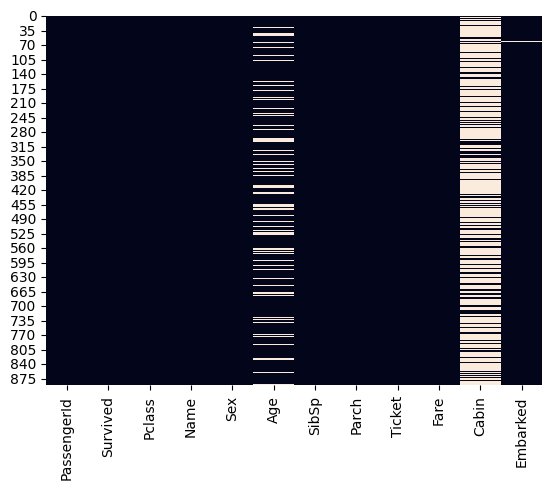

In [8]:
#Lets plot the null values in train_data:
sns.heatmap(train_data.isnull(), cbar=False)

In [9]:
#Check the columns:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# Copy the dataset:
df = train_data.copy()

### Impute the Missing value data :

In [11]:
# Impute the missing data with its category:
categorical_cols = ['Cabin', 'Embarked']
bool_cols = []
numeric_cols = ['Age']
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()

In [12]:
# A function used for missing value imputing in dataset: 
def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()
    
    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
      pass
    
    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass
    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values Age : 19.87%
MAE = 9.289865734265735 

RMSE = 11.687351934295634 

R2 = 0.2632626729896852 

Missing Values Cabin : 77.1%
The feature 'Cabin' has been imputed with 26.83 accuracy

Missing Values Embarked : 0.22%
The feature 'Embarked' has been imputed with 88.2 accuracy



In [13]:
#Check the null values in train_dat
df.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: >

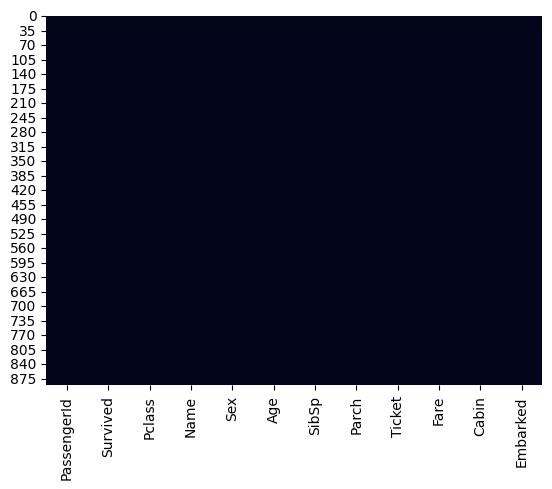

In [14]:
#Lets plot the null values in train_data:
sns.heatmap(df.isnull(), cbar=False)
 

In [15]:
#Test the test data missing values:
print(test_data.isnull().sum().sort_values(ascending=False))

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64


**Label Encoder used for Enconding the dataset**

In [16]:
#Split the df with X, y :
X = df.drop(['Survived', 'Name'] , axis=1)
y = df['Survived']

#Encode the df with label encoder used as for loop:
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])
    else:
        pass

#Split the data into X and y train and test:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)    

In [17]:
#Check the splited training data:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,1,1,45.5,0,0,20,28.5000,56,2
733,734,2,1,23.0,0,0,228,13.0000,90,2
382,383,3,1,32.0,0,0,665,7.9250,115,2
704,705,3,1,26.0,1,0,398,7.8542,143,2
813,814,3,0,6.0,4,2,333,31.2750,20,2


## Make th Neural Network Model with Tensorflow to train the Dataset:

In [18]:
#Create a tensorflow for binary classification:
import tensorflow as tf
#Import the sequential:
from tensorflow.keras.models import Sequential
#Built the neural network model:
input_layer = tf.keras.layers.Dense(64, activation='relu', input_shape = (X_train.shape[1],))
hidden_layer = tf.keras.layers.Dense(32, activation='relu')
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')
#Make the model:
model = Sequential([input_layer, hidden_layer, output_layer])
#Compile the model:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Train the model:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
#evaluate the model:
model.evaluate(X_test, y_test)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5294 - loss: 4.7619
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5637 - loss: 2.6044
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6240 - loss: 1.3241
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6169 - loss: 0.9862
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6158 - loss: 1.1262
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6633 - loss: 0.7329
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6498 - loss: 0.7199
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6837 - loss: 0.7353
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6810 - loss: 0.6970
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5961 - loss: 1.2657
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6708 - loss: 0.8167
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy:

[0.7114343047142029, 0.7094972133636475]

### **Compile, Fit and Plot the model :**

- **A Plot between Accuray and Viladation Accuracy**

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7105 - loss: 1.1387 - val_accuracy: 0.6704 - val_loss: 0.9529
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7948 - loss: 0.6049 - val_accuracy: 0.6927 - val_loss: 0.7459
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7979 - loss: 0.4541 - val_accuracy: 0.6704 - val_loss: 0.8667
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7819 - loss: 0.6652 - val_accuracy: 0.6592 - val_loss: 0.9349
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7893 - loss: 0.5133 - val_accuracy: 0.6983 - val_loss: 0.8801
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7760 - loss: 0.5084 - val_accuracy: 0.6536 - val_loss: 0.7557
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7452 - loss: 0.5621 - val_accuracy: 0.6983 - val_loss: 0.7013
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7474 - loss: 0.6777 - val_accuracy: 0.7486 - 

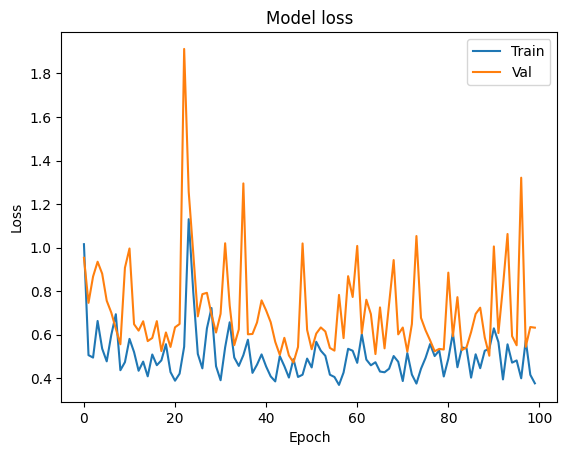

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Train the model:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)
# Apply the Evalution model:
loss = model.evaluate(X_test, y_test, verbose=1)
loss
#Plot the graph:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### **Apply the Early Stopping Method :**

In [20]:
#Import the early stop library of tf:
from tensorflow.keras.callbacks import EarlyStopping
#Built the neural network model:
input_layer = tf.keras.layers.Dense(64, activation='relu', input_shape = (X_train.shape[1],))
hidden_layer = tf.keras.layers.Dense(32, activation='relu')
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')
#Make the model:
model = Sequential([input_layer, hidden_layer, output_layer])
#Compile the model:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Use the Eraly Stopped function:
early_stopping = EarlyStopping(patience=15)
#Train the model:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])
# Apply the Evalution model:
loss = model.evaluate(X_test, y_test, verbose=1)
print(f'The loss value:,{loss}%')


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5081 - loss: 10.4285 - val_accuracy: 0.5978 - val_loss: 4.0396
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5592 - loss: 3.1684 - val_accuracy: 0.4413 - val_loss: 1.7082
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5829 - loss: 1.3989 - val_accuracy: 0.6425 - val_loss: 1.1421
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6065 - loss: 1.1162 - val_accuracy: 0.4413 - val_loss: 1.8660
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5499 - loss: 1.3941 - val_accuracy: 0.6927 - val_loss: 0.6631
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6683 - loss: 0.7660 - val_accuracy: 0.6760 - val_loss: 0.7623
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6582 - loss: 0.7756 - val_accuracy: 0.6872 - val_loss: 0.8641
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6528 - loss: 0.7848 - val_accuracy: 0.6872

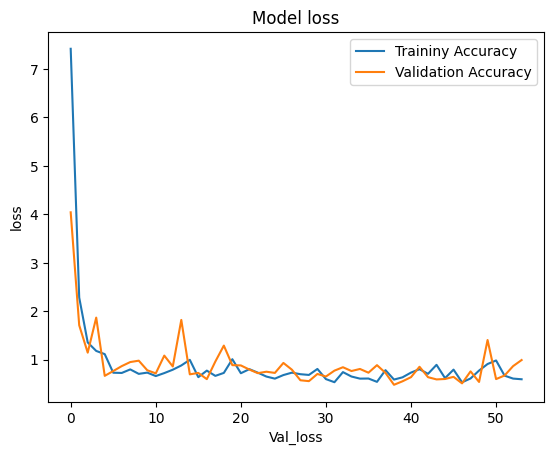

In [23]:
#Plot the graph:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Val_loss')
plt.legend(['Traininy Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()

**A plot with Early Stopping which differenciate between Training Accuray and Validation Accuracy :**

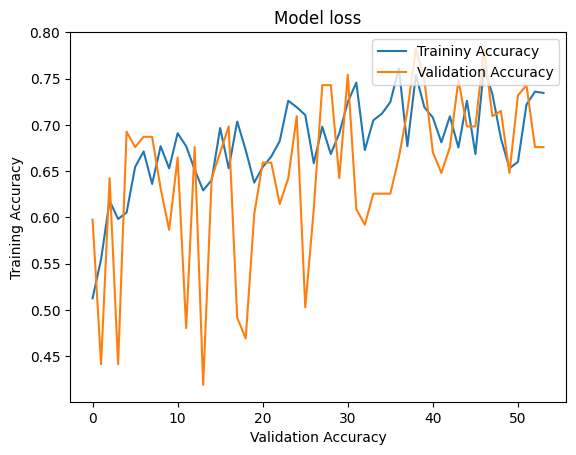

In [21]:
#Plot the graph:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Training Accuracy')
plt.xlabel('Validation Accuracy')
plt.legend(['Traininy Accuracy', 'Validation Accuracy'], loc='upper right')
plt.show()